### Getting Started With ML Project With MLFLOW

- Installing MLflow.

- Starting a local MLflow Tracking Server.

- Logging and registering a model with MLflow.

- Loading a logged model for inference using MLflow’s pyfunc flavor.

- Viewing the experiment results in the MLflow UI.

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import mlflow
from mlflow.models import infer_signature
import matplotlib.pyplot as plt

In [2]:
## set the tracking uri
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

In [9]:
## load the dataset
X,y=datasets.load_iris(return_X_y=True)
print(X.shape,y.shape)

(150, 4) (150,)


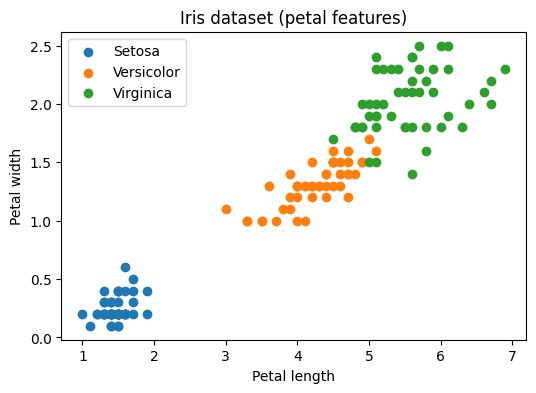

In [ ]:
# plot the data
plt.figure(figsize=(6, 4))

# 0 → sepal length
# 1 → sepal width
# 2 → petal length
# 3 → petal width
plt.scatter(X[y == 0, 2], X[y == 0, 3], label="Setosa")
plt.scatter(X[y == 1, 2], X[y == 1, 3], label="Versicolor")
plt.scatter(X[y == 2, 2], X[y == 2, 3], label="Virginica")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()
plt.title("Iris dataset (petal features)")
plt.show()

In [ ]:
# split the data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

# Define the model hyperparameters
params = {"penalty":"l2","solver": "lbfgs", "max_iter": 1000, "multi_class": "auto", "random_state": 8888}

##train the model
lr=LogisticRegression(**params)
lr.fit(X_train,y_train)

c:\Users\meisa\Desktop\Code\ML\NLP\HuggingFace_course\.env\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,8888
,solver,'lbfgs'
,max_iter,1000
,multi_class,'auto'


In [10]:
X_test.shape

(30, 4)

In [11]:
## Prediction on the test set
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 1])

In [12]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


### MLFLOW Tracking

In [ ]:
### MLFLOW tracking
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

## create a new MLFLOW experiment
mlflow.set_experiment("MLFLOW Quickstart")

## Sstart an MLFLOW run
with mlflow.start_run():
    ## log the hyperparameters
    mlflow.log_params(params)

    ## Log the accuracy metrics
    mlflow.log_metric("accuracy",accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    ## Infer the model signature
    signature=infer_signature(X_train,lr.predict(X_train))

    ## log the model
    model_info=mlflow.sklearn.log_model(
        sk_model=lr,
        #artifact_path="iris_model",
        name="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )    

2026/02/07 19:25:56 INFO mlflow.tracking.fluent: Experiment with name 'MLFLOW Quickstart' does not exist. Creating a new experiment.
2026/02/07 19:25:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\meisa\Desktop\Code\ML\NLP\HuggingFace_course\.env\lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


Successfully registered model 'tracking-quickstart'.
2026/02/07 19:26:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 1


🏃 View run overjoyed-crow-848 at: http://127.0.0.1:5000/#/experiments/2/runs/f1dee48c65274bfd8ff773695352a3f5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


Created version '1' of model 'tracking-quickstart'.


In [14]:
print(params)

{'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 1000, 'multi_class': 'auto', 'random_state': 8888}


In [15]:
# Define the model hyperparameters
params = {"solver": "newton-cg", "max_iter": 1000, "multi_class": "auto", "random_state": 1000}

##train the model

lr=LogisticRegression(**params)
lr.fit(X_train,y_train)

c:\Users\meisa\Desktop\Code\ML\NLP\HuggingFace_course\.env\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1000
,solver,'newton-cg'
,max_iter,1000
,multi_class,'auto'


In [16]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 1])

In [17]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9333333333333333


In [ ]:
## Sstart an MLFLOW run
with mlflow.start_run():
    ## log the hyperparameters
    mlflow.log_params(params)

    ## Log the accuracy metrics
    mlflow.log_metric("accuracy",accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    ## Infer the model signature

    signature=infer_signature(X_train,lr.predict(X_train))

    ## log the model
    model_info=mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

2026/02/08 07:51:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\meisa\Desktop\Code\ML\NLP\HuggingFace_course\.env\lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


Registered model 'tracking-quickstart' already exists. Creating a new version of this model...
2026/02/08 07:51:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tracking-quickstart, version 2


🏃 View run marvelous-whale-183 at: http://127.0.0.1:5000/#/experiments/2/runs/4d5488319fca4085b95c24637cc2b7be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


Created version '2' of model 'tracking-quickstart'.


In [19]:
model_info.model_uri

'models:/m-ea17086dbf3c4a90baa19bb21ff7368f'

## Inferencing And Validating Model

In [20]:
from mlflow.models import validate_serving_input

model_uri = model_info.model_uri

# The model is logged with an input example. MLflow converts
# it into the serving payload format for the deployed model endpoint,
# and saves it to 'serving_input_payload.json'
serving_payload = """{
  "inputs": [
    [
      5.7,
      3.8,
      1.7,
      0.3
    ],
    [
      4.8,
      3.4,
      1.6,
      0.2
    ],
    [
      5.6,
      2.9,
      3.6,
      1.3
    ],
    [
      5.4,
      3.7,
      1.5,
      0.2
    ],
    [
      6.7,
      3.3,
      5.7,
      2.5
    ],
    [
      6.5,
      3.0,
      5.8,
      2.2
    ],
    [
      5.1,
      2.5,
      3.0,
      1.1
    ],
    [
      7.7,
      3.0,
      6.1,
      2.3
    ],
    [
      5.2,
      4.1,
      1.5,
      0.1
    ],
    [
      5.0,
      3.3,
      1.4,
      0.2
    ],
    [
      4.6,
      3.6,
      1.0,
      0.2
    ],
    [
      4.5,
      2.3,
      1.3,
      0.3
    ],
    [
      5.6,
      2.8,
      4.9,
      2.0
    ],
    [
      6.2,
      3.4,
      5.4,
      2.3
    ],
    [
      6.3,
      3.4,
      5.6,
      2.4
    ],
    [
      4.8,
      3.4,
      1.9,
      0.2
    ],
    [
      5.8,
      2.7,
      5.1,
      1.9
    ],
    [
      7.2,
      3.0,
      5.8,
      1.6
    ],
    [
      5.4,
      3.9,
      1.7,
      0.4
    ],
    [
      6.9,
      3.2,
      5.7,
      2.3
    ],
    [
      6.5,
      3.0,
      5.5,
      1.8
    ],
    [
      7.7,
      2.6,
      6.9,
      2.3
    ],
    [
      6.4,
      3.1,
      5.5,
      1.8
    ],
    [
      5.2,
      3.5,
      1.5,
      0.2
    ],
    [
      6.3,
      2.9,
      5.6,
      1.8
    ],
    [
      4.9,
      3.1,
      1.5,
      0.2
    ],
    [
      7.9,
      3.8,
      6.4,
      2.0
    ],
    [
      5.5,
      4.2,
      1.4,
      0.2
    ],
    [
      6.1,
      3.0,
      4.9,
      1.8
    ],
    [
      5.0,
      3.2,
      1.2,
      0.2
    ],
    [
      4.9,
      3.0,
      1.4,
      0.2
    ],
    [
      6.0,
      2.2,
      4.0,
      1.0
    ],
    [
      5.0,
      3.6,
      1.4,
      0.2
    ],
    [
      4.6,
      3.4,
      1.4,
      0.3
    ],
    [
      6.9,
      3.1,
      5.1,
      2.3
    ],
    [
      5.0,
      3.5,
      1.3,
      0.3
    ],
    [
      5.8,
      2.8,
      5.1,
      2.4
    ],
    [
      4.9,
      3.1,
      1.5,
      0.1
    ],
    [
      5.6,
      2.7,
      4.2,
      1.3
    ],
    [
      7.0,
      3.2,
      4.7,
      1.4
    ],
    [
      6.3,
      2.7,
      4.9,
      1.8
    ],
    [
      5.0,
      3.4,
      1.5,
      0.2
    ],
    [
      5.8,
      2.7,
      5.1,
      1.9
    ],
    [
      6.1,
      2.9,
      4.7,
      1.4
    ],
    [
      7.2,
      3.6,
      6.1,
      2.5
    ],
    [
      6.7,
      3.1,
      5.6,
      2.4
    ],
    [
      6.3,
      3.3,
      6.0,
      2.5
    ],
    [
      6.3,
      2.5,
      4.9,
      1.5
    ],
    [
      4.8,
      3.1,
      1.6,
      0.2
    ],
    [
      6.4,
      2.8,
      5.6,
      2.1
    ],
    [
      6.2,
      2.9,
      4.3,
      1.3
    ],
    [
      5.7,
      2.5,
      5.0,
      2.0
    ],
    [
      6.0,
      3.4,
      4.5,
      1.6
    ],
    [
      5.2,
      3.4,
      1.4,
      0.2
    ],
    [
      5.7,
      4.4,
      1.5,
      0.4
    ],
    [
      5.0,
      2.3,
      3.3,
      1.0
    ],
    [
      6.2,
      2.2,
      4.5,
      1.5
    ],
    [
      6.3,
      2.3,
      4.4,
      1.3
    ],
    [
      6.3,
      2.8,
      5.1,
      1.5
    ],
    [
      5.1,
      3.3,
      1.7,
      0.5
    ],
    [
      6.0,
      2.9,
      4.5,
      1.5
    ],
    [
      6.5,
      3.0,
      5.2,
      2.0
    ],
    [
      5.3,
      3.7,
      1.5,
      0.2
    ],
    [
      6.8,
      2.8,
      4.8,
      1.4
    ],
    [
      5.9,
      3.0,
      5.1,
      1.8
    ],
    [
      4.7,
      3.2,
      1.6,
      0.2
    ],
    [
      5.5,
      3.5,
      1.3,
      0.2
    ],
    [
      6.7,
      3.0,
      5.2,
      2.3
    ],
    [
      5.7,
      2.6,
      3.5,
      1.0
    ],
    [
      5.8,
      2.7,
      4.1,
      1.0
    ],
    [
      5.5,
      2.5,
      4.0,
      1.3
    ],
    [
      5.1,
      3.8,
      1.9,
      0.4
    ],
    [
      5.7,
      2.8,
      4.5,
      1.3
    ],
    [
      6.7,
      3.1,
      4.4,
      1.4
    ],
    [
      6.4,
      3.2,
      5.3,
      2.3
    ],
    [
      7.7,
      2.8,
      6.7,
      2.0
    ],
    [
      5.5,
      2.6,
      4.4,
      1.2
    ],
    [
      5.7,
      2.9,
      4.2,
      1.3
    ],
    [
      7.4,
      2.8,
      6.1,
      1.9
    ],
    [
      7.6,
      3.0,
      6.6,
      2.1
    ],
    [
      6.3,
      3.3,
      4.7,
      1.6
    ],
    [
      5.4,
      3.0,
      4.5,
      1.5
    ],
    [
      6.2,
      2.8,
      4.8,
      1.8
    ],
    [
      4.4,
      3.2,
      1.3,
      0.2
    ],
    [
      6.6,
      2.9,
      4.6,
      1.3
    ],
    [
      7.2,
      3.2,
      6.0,
      1.8
    ],
    [
      4.7,
      3.2,
      1.3,
      0.2
    ],
    [
      5.7,
      2.8,
      4.1,
      1.3
    ],
    [
      5.5,
      2.3,
      4.0,
      1.3
    ],
    [
      5.1,
      3.8,
      1.5,
      0.3
    ],
    [
      6.1,
      2.6,
      5.6,
      1.4
    ],
    [
      4.6,
      3.2,
      1.4,
      0.2
    ],
    [
      6.7,
      3.3,
      5.7,
      2.1
    ],
    [
      6.7,
      3.1,
      4.7,
      1.5
    ],
    [
      5.6,
      2.5,
      3.9,
      1.1
    ],
    [
      5.1,
      3.5,
      1.4,
      0.2
    ],
    [
      5.0,
      3.4,
      1.6,
      0.4
    ],
    [
      5.1,
      3.5,
      1.4,
      0.3
    ],
    [
      4.8,
      3.0,
      1.4,
      0.1
    ],
    [
      6.1,
      2.8,
      4.7,
      1.2
    ],
    [
      5.9,
      3.0,
      4.2,
      1.5
    ],
    [
      5.0,
      3.5,
      1.6,
      0.6
    ],
    [
      6.1,
      3.0,
      4.6,
      1.4
    ],
    [
      6.8,
      3.0,
      5.5,
      2.1
    ],
    [
      5.1,
      3.8,
      1.6,
      0.2
    ],
    [
      5.7,
      3.0,
      4.2,
      1.2
    ],
    [
      4.4,
      2.9,
      1.4,
      0.2
    ],
    [
      4.4,
      3.0,
      1.3,
      0.2
    ],
    [
      5.4,
      3.4,
      1.5,
      0.4
    ],
    [
      7.7,
      3.8,
      6.7,
      2.2
    ],
    [
      5.0,
      2.0,
      3.5,
      1.0
    ],
    [
      6.4,
      2.9,
      4.3,
      1.3
    ],
    [
      6.0,
      2.2,
      5.0,
      1.5
    ],
    [
      4.6,
      3.1,
      1.5,
      0.2
    ],
    [
      5.8,
      2.7,
      3.9,
      1.2
    ],
    [
      4.9,
      2.5,
      4.5,
      1.7
    ],
    [
      4.8,
      3.0,
      1.4,
      0.3
    ],
    [
      5.4,
      3.9,
      1.3,
      0.4
    ],
    [
      6.4,
      3.2,
      4.5,
      1.5
    ],
    [
      6.3,
      2.5,
      5.0,
      1.9
    ]
  ]
}"""

# Validate the serving payload works on the model
validate_serving_input(model_uri, serving_payload)

array([0, 0, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0,
       0, 2, 1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 1,
       1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 2])

## Load the model back for prediction as a generic python function model

In [21]:
loaded_model=mlflow.pyfunc.load_model(model_info.model_uri)
predictions=loaded_model.predict(X_test)

iris_features_name=datasets.load_iris().feature_names

result=pd.DataFrame(X_test,columns=iris_features_name)
result["actual_class"]=y_test
result["predcited_class"]=predictions

In [17]:
result[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,predcited_class
0,5.1,3.4,1.5,0.2,0,0
1,6.0,3.0,4.8,1.8,2,2
2,7.3,2.9,6.3,1.8,2,2
3,6.6,3.0,4.4,1.4,1,1
4,7.1,3.0,5.9,2.1,2,2


### Model Registry

The MLflow Model Registry component is a centralized model store, set of APIs, and UI, to collaboratively manage the full lifecycle of an MLflow Model. It provides model lineage (which MLflow experiment and run produced the model), model versioning, model aliasing, model tagging, and annotations.

In [ ]:
##create a new MLFLOW experiment
mlflow.set_experiment("MLFLOW Quickstart")

## Sstart an MLFLOW run
with mlflow.start_run():
    ## log the hyperparameters
    mlflow.log_params(params)

    ## Log the accuracy metrics
    mlflow.log_metric("accuracy",1.0)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info2", "Basic LR model for iris data")

    ## Infer the model signature

    signature=infer_signature(X_train,lr.predict(X_train))

    ## log the model
    model_info=mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
    )

2026/02/09 08:57:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\meisa\Desktop\Code\ML\NLP\HuggingFace_course\.env\lib\site-packages\mlflow\models\model.py:1209: FutureWarning: Saving scikit-learn models in the pickle or cloudpickle format requires exercising caution because these formats rely on Python's object serialization mechanism, which can execute arbitrary code during deserialization.The recommended safe alternative is the 'skops' format.
  flavor.save_model(path=local_path, mlflow_model=mlflow_model, **kwargs)


🏃 View run bald-bug-910 at: http://127.0.0.1:5000/#/experiments/2/runs/cfe3883907f34e8dbee8ba022cffdd8b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2


In [23]:
## Inferencing from model from model registry

import mlflow.sklearn
model_name="tracking-quickstart"
model_version="latest"

model_uri=f"models:/{model_name}/{model_version}"

model=mlflow.sklearn.load_model(model_uri)
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1000
,solver,'newton-cg'
,max_iter,1000
,multi_class,'auto'


In [24]:
model_uri

'models:/tracking-quickstart/latest'

In [25]:
y_pred_new=model.predict(X_test)
y_pred_new

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 2, 1,
       2, 0, 0, 0, 0, 2, 0, 1])